In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import os

assets_folder = 'assets'

# Get a list of image filenames in the folder
image_files = [f for f in os.listdir(assets_folder) if f.endswith('.png')]
image_files

['Minimum_Nights_vs_Price.png',
 'Correlation_Matrix.png',
 'Availability_vs_Price.png',
 'Price_by_Room_Type_and_Neighborhood.png',
 'Number_of_Reviews_vs_Price.png',
 'Reviews_per_Month.png',
 'Distribution_of_Room_Types.png',
 'Average_Price_by_Neighborhood_Group.png',
 'Number_of_Listings_by_Host_vs_Price.png',
 'Availability_vs_Number_of_Reviews.png',
 'Sentiment_Analysis_of_Listing_Names.png',
 'Number_of_Listings_per_Host.png',
 'Monthly_Reviews_Over_Time.png',
 'Price_Distribution.png']

In [2]:
# Load the dataset
data = pd.read_csv('../data/NYC_air_bnb_dataset.csv')

In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Display the first few rows of the dataset
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Summary statistics
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Check for missing values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

/Users/kurtshiple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


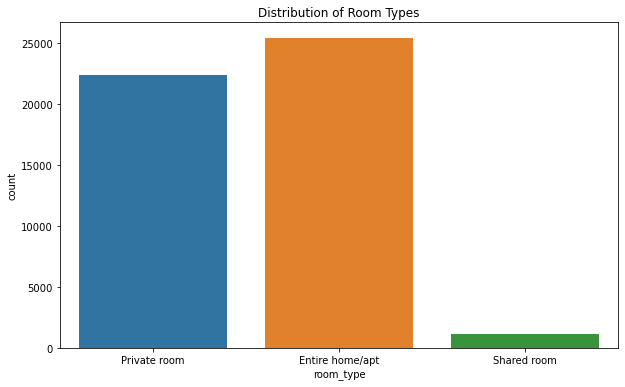

In [7]:
# Data visualization
# Distribution of room types
plt.figure(figsize=(10, 6))
sns.countplot(data['room_type'])
plt.title('Distribution of Room Types')
plt.savefig('assets/Distribution_of_Room_Types.png')
plt.show()

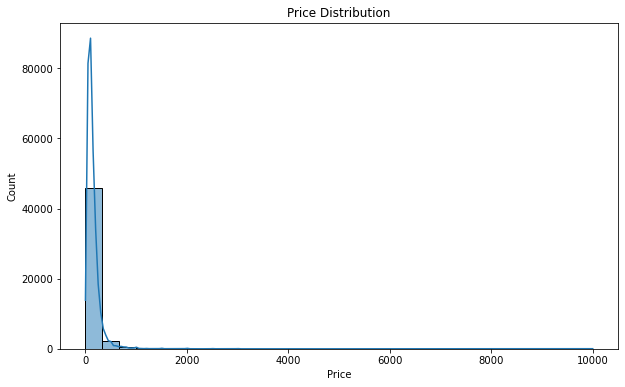

In [8]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('assets/Price_Distribution.png')
plt.show()

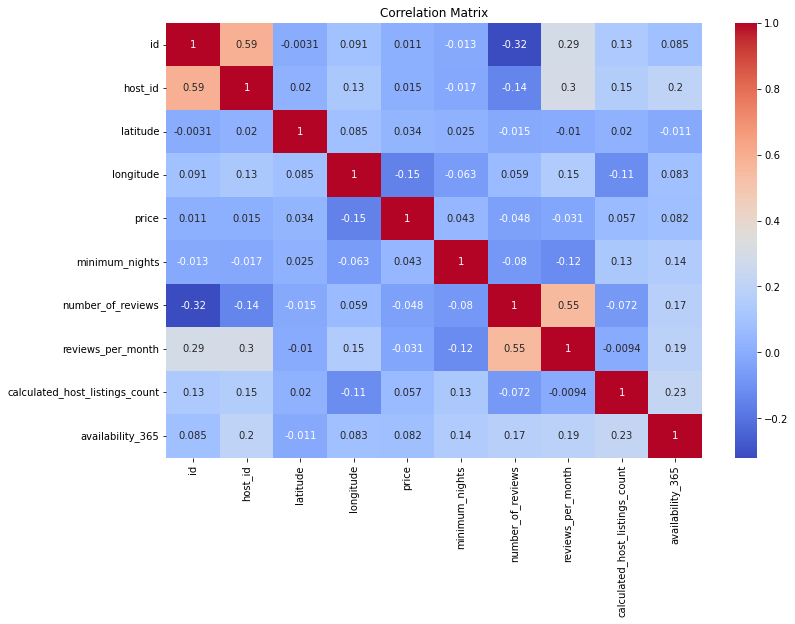

In [9]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('assets/Correlation_Matrix.png')
plt.show()

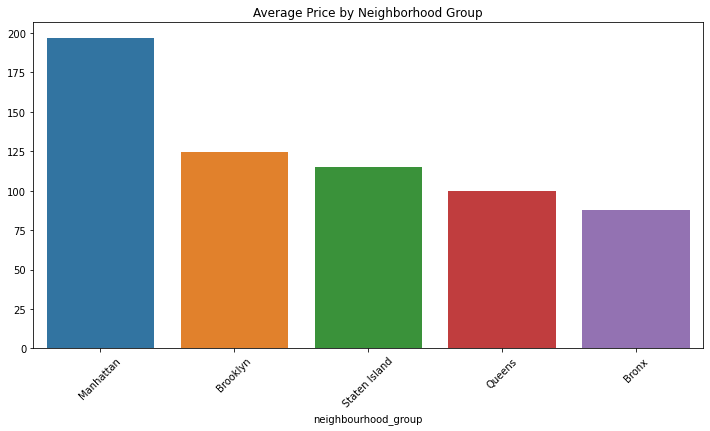

In [10]:
# Average price by neighborhood group
average_price_by_neighborhood = data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_neighborhood.index, y=average_price_by_neighborhood.values)
plt.title('Average Price by Neighborhood Group')
plt.xticks(rotation=45)
plt.savefig('assets/Average_Price_by_Neighborhood_Group.png')
plt.show()

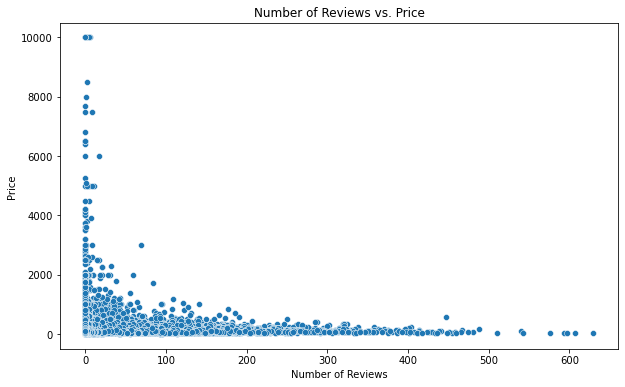

In [11]:
# Number of reviews vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=data)
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.savefig('assets/Number_of_Reviews_vs_Price.png')
plt.show()

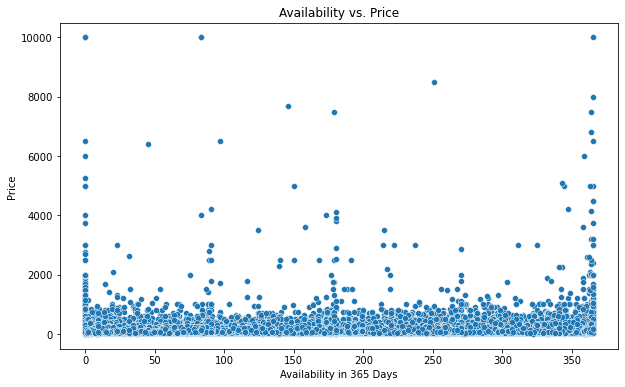

In [12]:
# Relationship between availability and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=data)
plt.title('Availability vs. Price')
plt.xlabel('Availability in 365 Days')
plt.ylabel('Price')
plt.savefig('assets/Availability_vs_Price.png')
plt.show()

In [13]:
# Pairplot for numerical variables
#sns.pairplot(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']])
#plt.savefig('assets/Pairplot.png')
#plt.show()

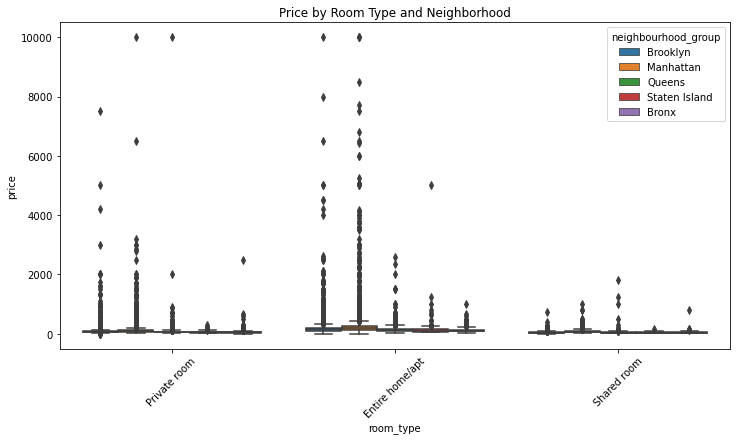

In [14]:
# Price by Room Type and Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', hue='neighbourhood_group', data=data)
plt.title('Price by Room Type and Neighborhood')
plt.xticks(rotation=45)
plt.savefig('assets/Price_by_Room_Type_and_Neighborhood.png')
plt.show()

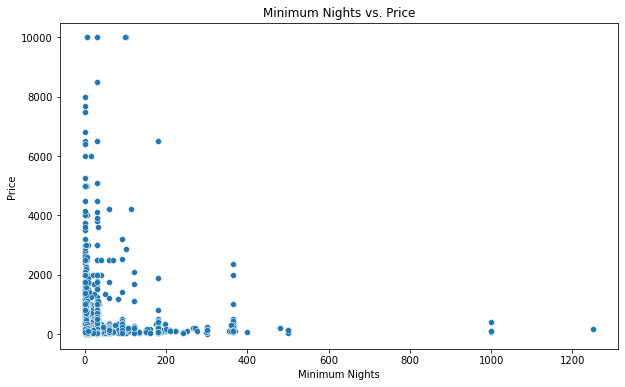

In [15]:
# Price by Minimum Nights Requirement
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=data)
plt.title('Minimum Nights vs. Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.savefig('assets/Minimum_Nights_vs_Price.png')

plt.show()

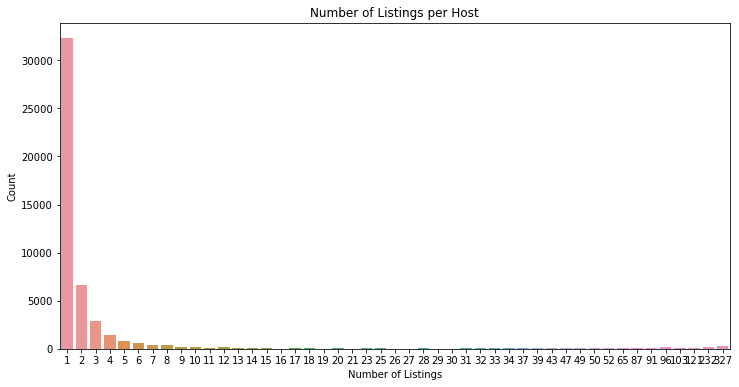

In [16]:
# Number of Listings by Host
host_listings_count = data['calculated_host_listings_count'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=host_listings_count.index, y=host_listings_count.values)
plt.title('Number of Listings per Host')
plt.xlabel('Number of Listings')
plt.ylabel('Count')
plt.savefig('assets/Number_of_Listings_per_Host.png')

plt.show()

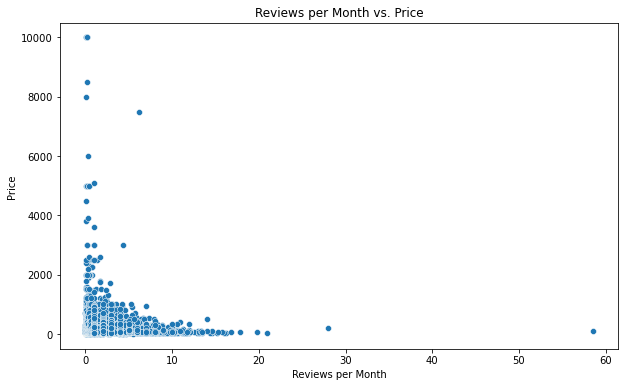

In [17]:
# Reviews per Month vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price', data=data)
plt.title('Reviews per Month vs. Price')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.savefig('assets/Reviews_per_Month.png')

plt.show()

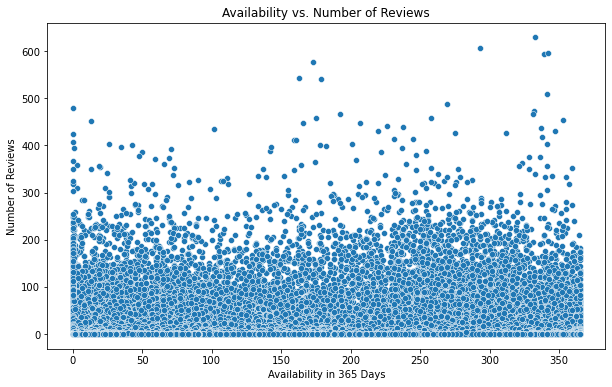

In [18]:

# Availability vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='number_of_reviews', data=data)
plt.title('Availability vs. Number of Reviews')
plt.xlabel('Availability in 365 Days')
plt.ylabel('Number of Reviews')
plt.savefig('assets/Availability_vs_Number_of_Reviews.png')

plt.show()


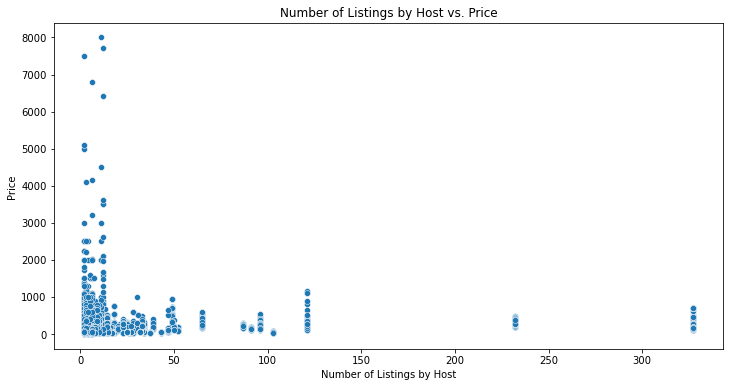

In [19]:
host_counts = data['host_id'].value_counts()
multiple_listings_hosts = host_counts[host_counts > 1]

# Create a new DataFrame with hosts who have multiple listings
multi_listings_data = data[data['host_id'].isin(multiple_listings_hosts.index)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='calculated_host_listings_count', y='price', data=multi_listings_data)
plt.title('Number of Listings by Host vs. Price')
plt.xlabel('Number of Listings by Host')
plt.ylabel('Price')
plt.savefig('assets/Number_of_Listings_by_Host_vs_Price.png')

plt.show()


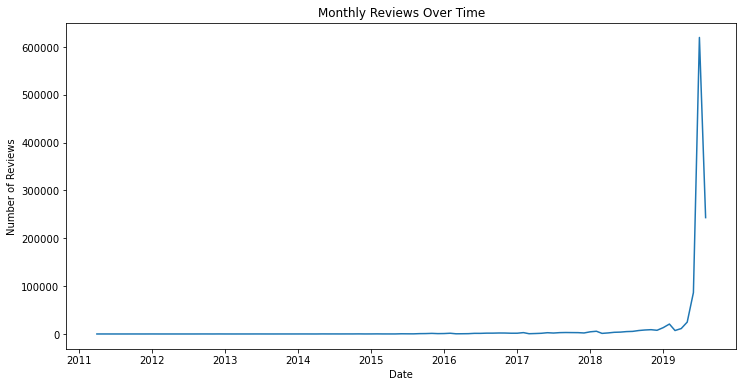

In [20]:
data['last_review'] = pd.to_datetime(data['last_review'])
data.set_index('last_review', inplace=True)

# Resample the data to monthly frequency
monthly_reviews = data['number_of_reviews'].resample('M').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_reviews.index, y=monthly_reviews.values)
plt.title('Monthly Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.savefig('assets/Monthly_Reviews_Over_Time.png')

plt.show()


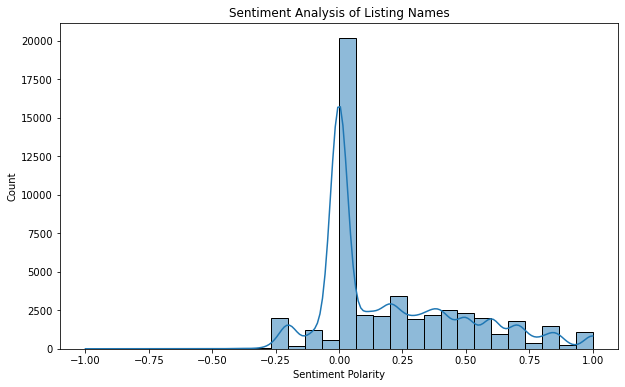

In [21]:
from textblob import TextBlob

# Perform sentiment analysis on the 'name' column
data['name_sentiment'] = data['name'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['name_sentiment'], bins=30, kde=True)
plt.title('Sentiment Analysis of Listing Names')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.savefig('assets/Sentiment_Analysis_of_Listing_Names.png')

plt.show()
